# 📌 Day 6: Handling Outliers in Machine Learning (Python)

Outliers are data points that significantly deviate from the rest of the dataset. They can distort machine learning models, reducing accuracy. Detecting and handling them properly improves model performance.

## 📊 **Why Handle Outliers?**
✅ Prevents biased model training  
✅ Enhances data reliability  
✅ Improves prediction accuracy  

## 🔍 **Methods for Outlier Detection and Handling**
### 1️⃣ **Visualization Techniques**
- **Box Plot**: Helps visualize data distribution  
- **Histogram**: Identifies skewness in data  
- **Scatter Plot**: Detects anomalies  

### 2️⃣ **Statistical Methods**
- **Interquartile Range (IQR):** Removes values outside **1.5 times the IQR**  
- **Z-Score:** Filters values with **z-score greater than 3**  

### 3️⃣ **Machine Learning Methods**
- **Isolation Forest**  
- **DBSCAN (Density-Based Clustering)**  

---

In [33]:
# Importing Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

## 📌 Generate Sample Data with Outliers

In [34]:
np.random.seed(42)
data = np.random.normal(50,15,100) # Normal Data
outliers = np.array([10,100,105,3,150]) # Outlier values
data_with_outliers = np.concatenate((data,outliers)) # Data with Outliers

## 📌 Create DataFrame

In [35]:
df = pd.DataFrame({'values': data_with_outliers})

In [36]:
df

,values
0,57.450712
1,47.926035
2,59.715328
3,72.845448
4,46.487699
...,...
100,10.000000
101,100.000000
102,105.000000
103,3.000000


## 📊 Visualizing Outliers using Boxplot

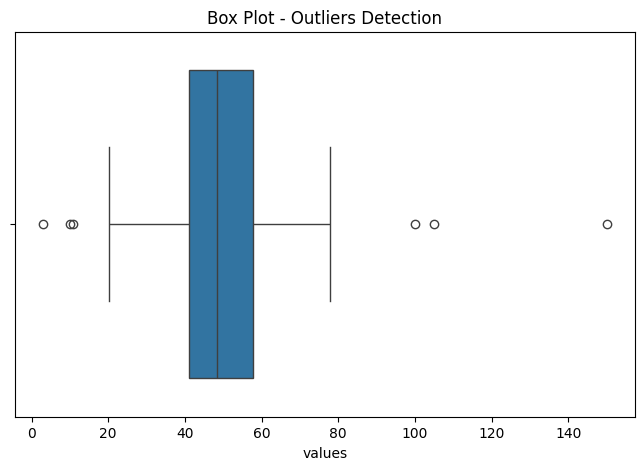

In [37]:
# 📊 Visualizing Outliers using Boxplot
plt.figure(figsize=(8, 5))

sns.boxplot(x=df['values'])
plt.title("Box Plot - Outliers Detection")
plt.savefig("outlier_results.png")  # Save boxplot image
plt.show()


## 📌 Method 1: Detecting & Removing Outliers using IQR Method

In [38]:
# 📌 Method 1: Detecting & Removing Outliers using IQR Method
Q1 = df['values'].quantile(0.25)
Q3 = df['values'].quantile(0.75)
IQR = Q3 - Q1

In [39]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [40]:
df_iqr_filtered = df[(df['values'] >= lower_bound) & (df['values'] <= upper_bound)]

In [41]:
df_iqr_filtered

,values
0,57.450712
1,47.926035
2,59.715328
3,72.845448
4,46.487699
...,...
95,28.047276
96,54.441804
97,53.915829
98,50.076702


## 📌 Method 2: Detecting & Removing Outliers using Z-Score

In [42]:
df['z_score'] = zscore(df['values'])
df_zscore_filtered = df[abs(df['z_score']) < 3].drop(columns=['z_score'])


In [43]:
df_zscore_filtered

,values
0,57.450712
1,47.926035
2,59.715328
3,72.845448
4,46.487699
...,...
99,46.481193
100,10.000000
101,100.000000
102,105.000000


## 📊 Compare Before & After Outlier Removal

In [44]:
# 📊 Compare Before & After Outlier Removal
print("Original Data Size:", df.shape[0])
print("After IQR Filtering:", df_iqr_filtered.shape[0])
print("After Z-Score Filtering:", df_zscore_filtered.shape[0])

Original Data Size: 105
After IQR Filtering: 99
After Z-Score Filtering: 104


## 📊 Visualization After Removing Outliers

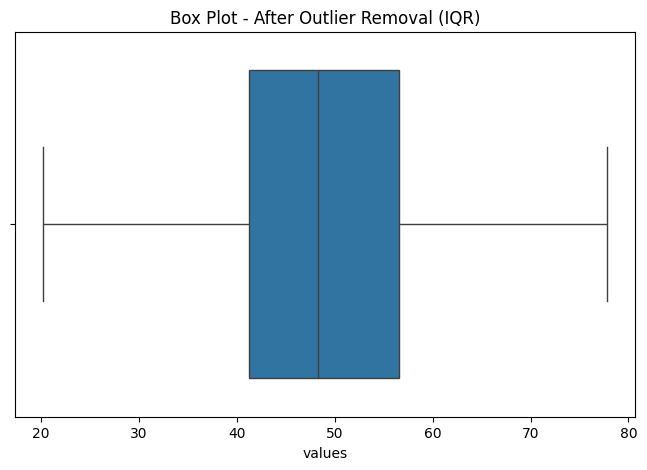

In [45]:
# 📊 Visualization After Removing Outliers

plt.figure(figsize=(8, 5))
sns.boxplot(x=df_iqr_filtered['values'])
plt.title("Box Plot - After Outlier Removal (IQR)")
plt.savefig("outlier_results_filtered.png")  # Save filtered boxplot image
plt.show()